In [47]:
# Building the Car of the Future - Linear Regression Analysis
# Author: Daniel Makala Mackaemba
# Description: Enhanced data cleaning, linear regression modeling, and comprehensive visualizations
# Dataset: car.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [49]:
# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

In [51]:
# =============================
# Part 1: Data Loading & Exploration
# =============================
print("=" * 60)
print("PART 1: DATA LOADING & INITIAL EXPLORATION")
print("=" * 60)

# Load dataset
df = pd.read_csv('car.csv')
print(f"\nOriginal dataset shape: {df.shape}")
print(f"\nColumn names:\n{df.columns.tolist()}")
print(f"\nFirst few rows:\n{df.head()}")
print(f"\nDataset info:")
df.info()

# Check for missing values
print(f"\nMissing values per column:")
print(df.isnull().sum())

PART 1: DATA LOADING & INITIAL EXPLORATION

Original dataset shape: (398, 8)

Column names:
['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'US Made']

First few rows:
    MPG  Cylinders  Displacement Horsepower  Weight  Acceleration  Model Year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   US Made  
0        1  
1        1  
2        1  
3        1  
4        1  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           

In [53]:
# =============================
# Part 2: Data Cleaning
# =============================
print("\n" + "=" * 60)
print("PART 2: DATA CLEANING")
print("=" * 60)

# Convert Horsepower to numeric
df['Horsepower'] = pd.to_numeric(df['Horsepower'], errors='coerce')
print(f"\nMissing values after Horsepower conversion:")
print(df.isnull().sum())

# Store original size
original_size = len(df)

# Remove rows with missing values
df_clean = df.dropna()
removed_rows = original_size - len(df_clean)
print(f"\nRows removed: {removed_rows} ({removed_rows/original_size*100:.2f}%)")
print(f"Clean dataset shape: {df_clean.shape}")

# Check for duplicates
duplicates = df_clean.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

# Statistical summary
print(f"\nStatistical Summary:")
print(df_clean.describe())



PART 2: DATA CLEANING

Missing values after Horsepower conversion:
MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
US Made         0
dtype: int64

Rows removed: 6 (1.51%)
Clean dataset shape: (392, 8)
Duplicate rows: 0

Statistical Summary:
              MPG   Cylinders  Displacement  Horsepower       Weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       Acceleration  Model Year


PART 3: EXPLORATORY DATA ANALYSIS


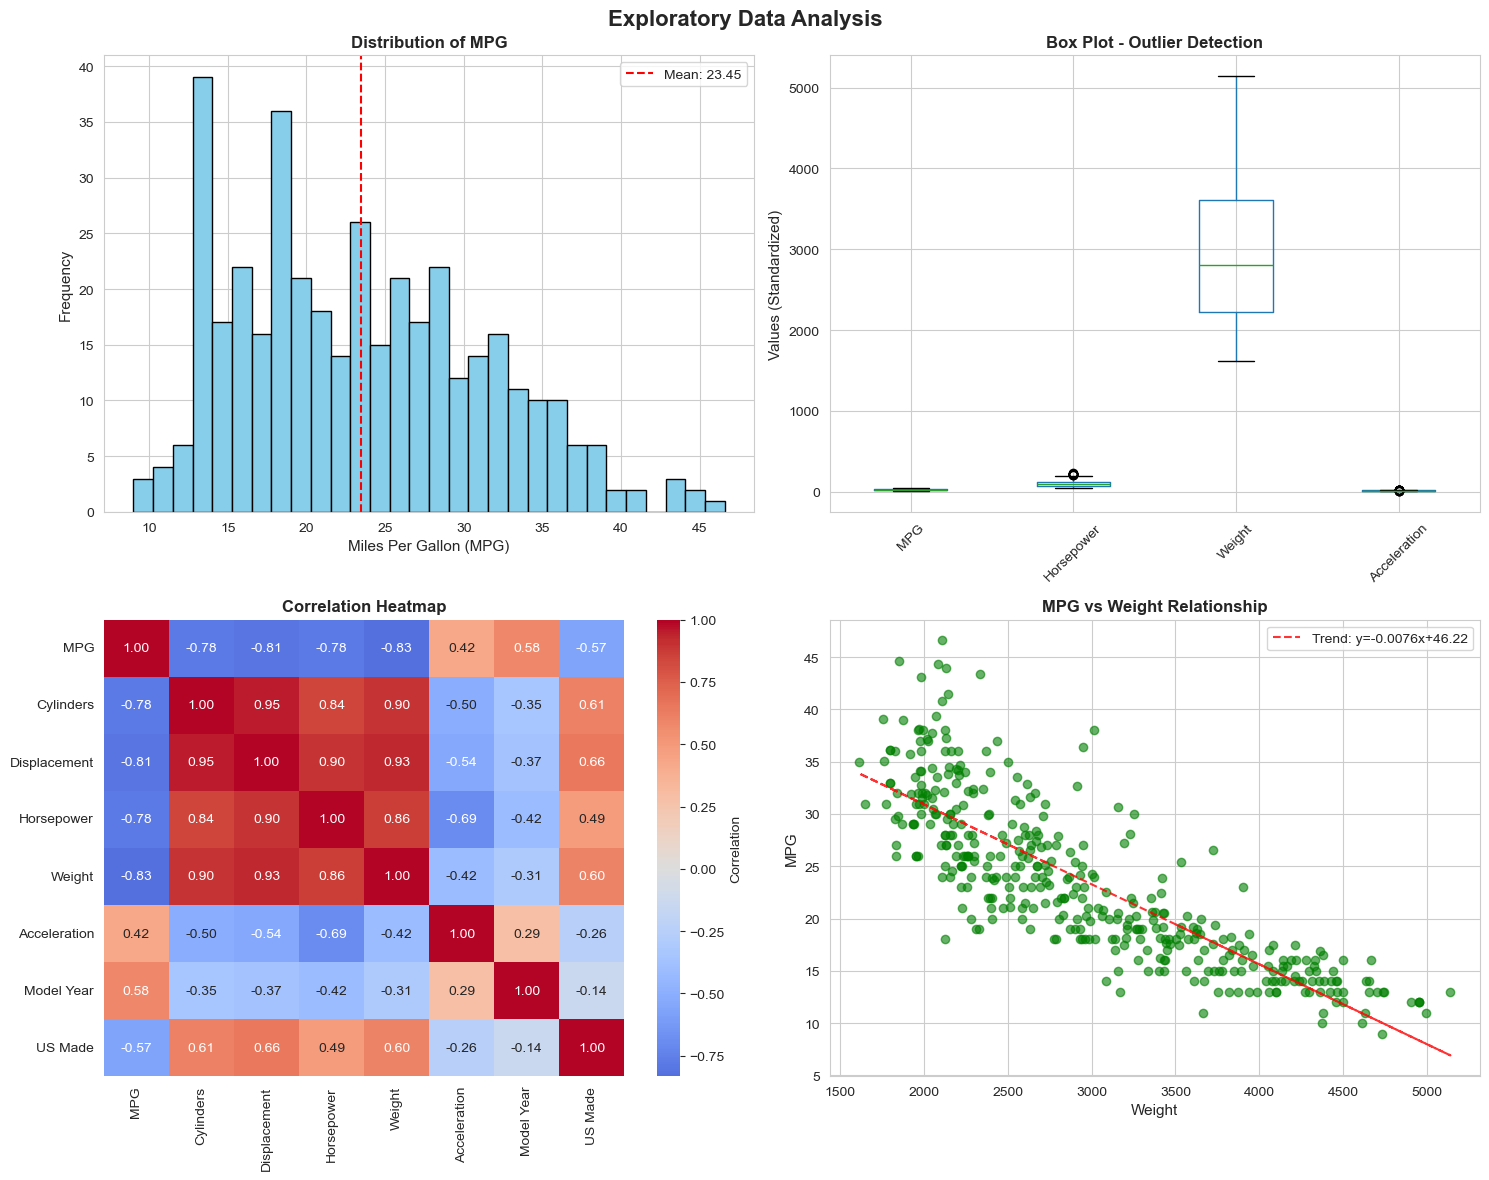

In [55]:
# =============================
# Part 3: Data Visualizations - Exploration
# =============================
print("\n" + "=" * 60)
print("PART 3: EXPLORATORY DATA ANALYSIS")
print("=" * 60)

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Exploratory Data Analysis', fontsize=16, fontweight='bold')

# 1. Distribution of Target Variable (MPG)
axes[0, 0].hist(df_clean['MPG'], bins=30, color='skyblue', edgecolor='black')
axes[0, 0].set_xlabel('Miles Per Gallon (MPG)', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].set_title('Distribution of MPG', fontsize=12, fontweight='bold')
axes[0, 0].axvline(df_clean['MPG'].mean(), color='red', linestyle='--', 
                    label=f'Mean: {df_clean["MPG"].mean():.2f}')
axes[0, 0].legend()

# 2. Box plot to detect outliers
df_clean.boxplot(ax=axes[0, 1], column=['MPG', 'Horsepower', 'Weight', 'Acceleration'])
axes[0, 1].set_title('Box Plot - Outlier Detection', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Values (Standardized)', fontsize=11)
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Correlation Heatmap
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
correlation_matrix = df_clean[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, ax=axes[1, 0], cbar_kws={'label': 'Correlation'})
axes[1, 0].set_title('Correlation Heatmap', fontsize=12, fontweight='bold')

# 4. Scatter plot - MPG vs Weight (strongest correlation)
axes[1, 1].scatter(df_clean['Weight'], df_clean['MPG'], alpha=0.6, color='green')
axes[1, 1].set_xlabel('Weight', fontsize=11)
axes[1, 1].set_ylabel('MPG', fontsize=11)
axes[1, 1].set_title('MPG vs Weight Relationship', fontsize=12, fontweight='bold')
# Add trend line
z = np.polyfit(df_clean['Weight'], df_clean['MPG'], 1)
p = np.poly1d(z)
axes[1, 1].plot(df_clean['Weight'], p(df_clean['Weight']), "r--", alpha=0.8, 
                label=f'Trend: y={z[0]:.4f}x+{z[1]:.2f}')
axes[1, 1].legend()

plt.tight_layout()
plt.savefig('exploratory_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


In [57]:
# =============================
# Part 4: Linear Regression Model
# =============================
print("\n" + "=" * 60)
print("PART 4: LINEAR REGRESSION MODEL")
print("=" * 60)

# Prepare features and target
X = df_clean.drop('MPG', axis=1)
y = df_clean['MPG']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

# Train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Evaluation
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("\nModel Performance:")
print(f"Training R² Score: {train_r2:.4f}")
print(f"Testing R² Score: {test_r2:.4f}")
print(f"Testing RMSE: {test_rmse:.4f}")
print(f"Testing MAE: {test_mae:.4f}")

# Model coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print("\nModel Coefficients (sorted by magnitude):")
print(coefficients)
print(f"\nIntercept: {lr.intercept_:.4f}")



PART 4: LINEAR REGRESSION MODEL

Training set size: 313
Testing set size: 79

Model Performance:
Training R² Score: 0.8285
Testing R² Score: 0.7924
Testing RMSE: 3.2552
Testing MAE: 2.4782

Model Coefficients (sorted by magnitude):
        Feature  Coefficient
6       US Made    -3.058007
5    Model Year     0.802775
0     Cylinders    -0.331130
4  Acceleration     0.044114
2    Horsepower    -0.020837
1  Displacement     0.019404
3        Weight    -0.006498

Intercept: -16.6855


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



PART 5: MODEL PERFORMANCE VISUALIZATIONS


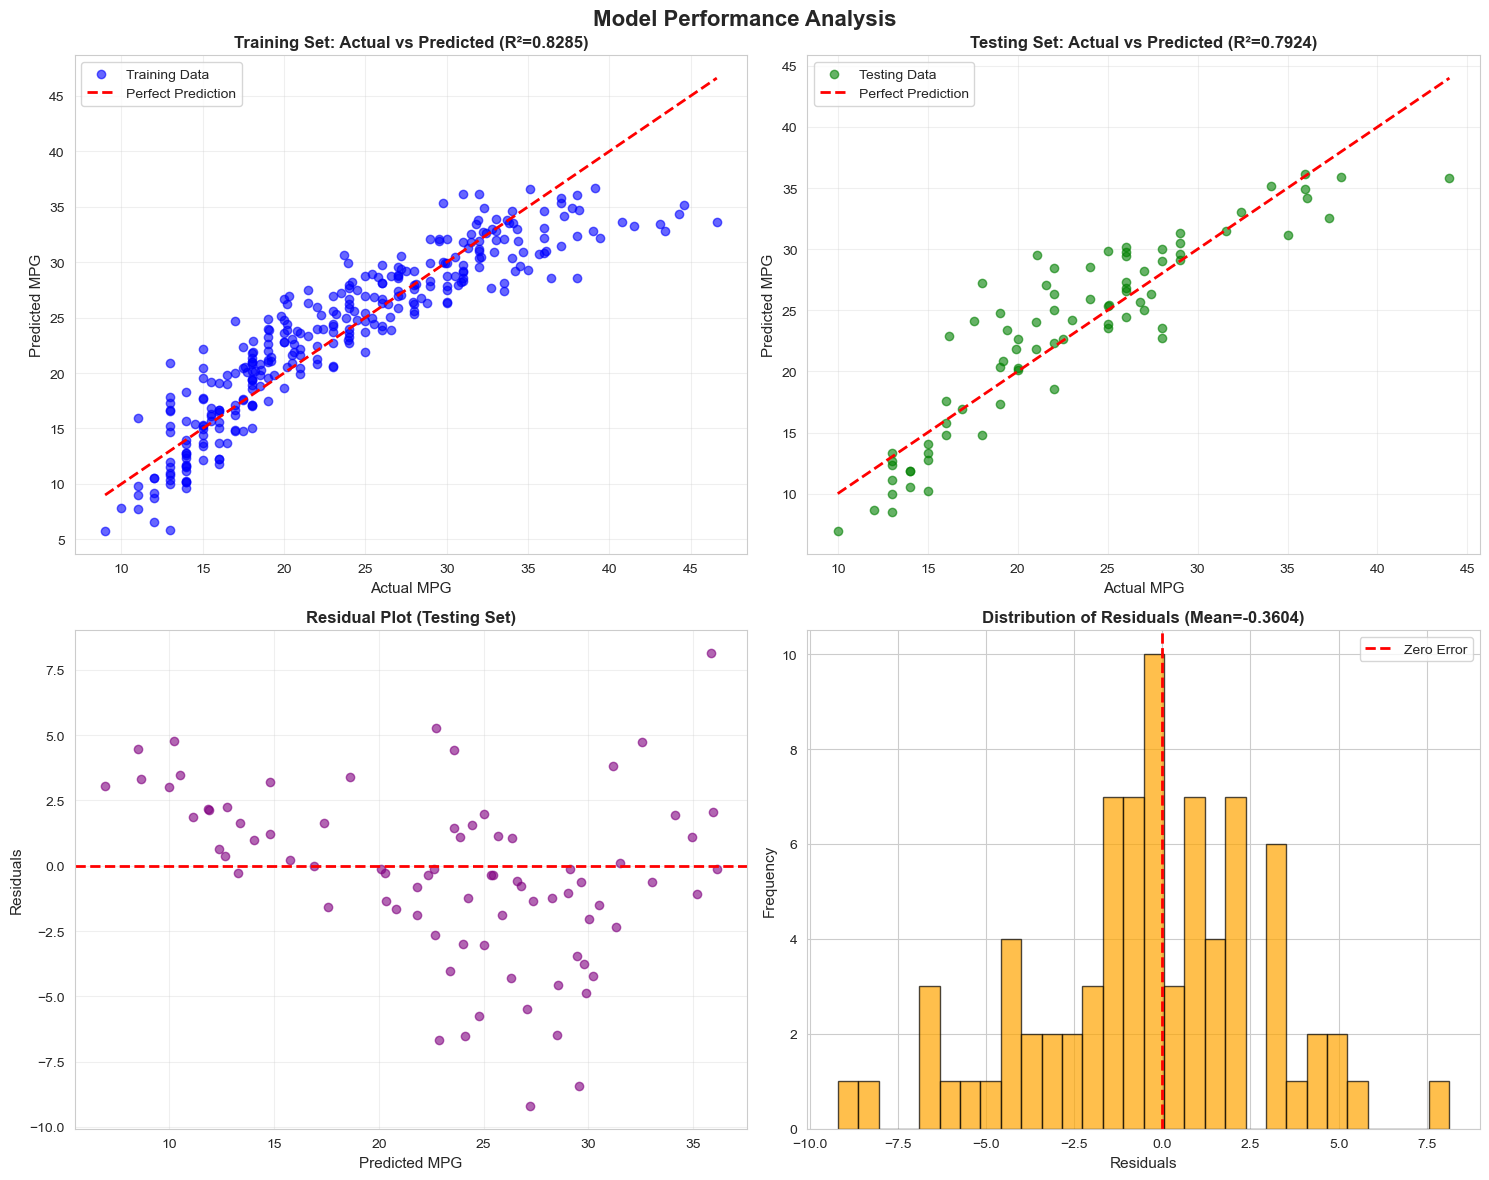

In [59]:
# =============================
# Part 5: Model Performance Visualizations
# =============================
print("\n" + "=" * 60)
print("PART 5: MODEL PERFORMANCE VISUALIZATIONS")
print("=" * 60)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Model Performance Analysis', fontsize=16, fontweight='bold')

# 1. Actual vs Predicted - Training
axes[0, 0].scatter(y_train, y_train_pred, alpha=0.6, color='blue', label='Training Data')
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 
                'r--', lw=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual MPG', fontsize=11)
axes[0, 0].set_ylabel('Predicted MPG', fontsize=11)
axes[0, 0].set_title(f'Training Set: Actual vs Predicted (R²={train_r2:.4f})', 
                     fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Actual vs Predicted - Testing
axes[0, 1].scatter(y_test, y_test_pred, alpha=0.6, color='green', label='Testing Data')
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
                'r--', lw=2, label='Perfect Prediction')
axes[0, 1].set_xlabel('Actual MPG', fontsize=11)
axes[0, 1].set_ylabel('Predicted MPG', fontsize=11)
axes[0, 1].set_title(f'Testing Set: Actual vs Predicted (R²={test_r2:.4f})', 
                     fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Residual Plot - Testing
residuals = y_test - y_test_pred
axes[1, 0].scatter(y_test_pred, residuals, alpha=0.6, color='purple')
axes[1, 0].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1, 0].set_xlabel('Predicted MPG', fontsize=11)
axes[1, 0].set_ylabel('Residuals', fontsize=11)
axes[1, 0].set_title('Residual Plot (Testing Set)', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# 4. Distribution of Residuals
axes[1, 1].hist(residuals, bins=30, color='orange', edgecolor='black', alpha=0.7)
axes[1, 1].axvline(x=0, color='red', linestyle='--', lw=2, label='Zero Error')
axes[1, 1].set_xlabel('Residuals', fontsize=11)
axes[1, 1].set_ylabel('Frequency', fontsize=11)
axes[1, 1].set_title(f'Distribution of Residuals (Mean={residuals.mean():.4f})', 
                     fontsize=12, fontweight='bold')
axes[1, 1].legend()

plt.tight_layout()
plt.savefig('model_performance.png', dpi=300, bbox_inches='tight')
plt.show()



PART 6: FEATURE IMPORTANCE


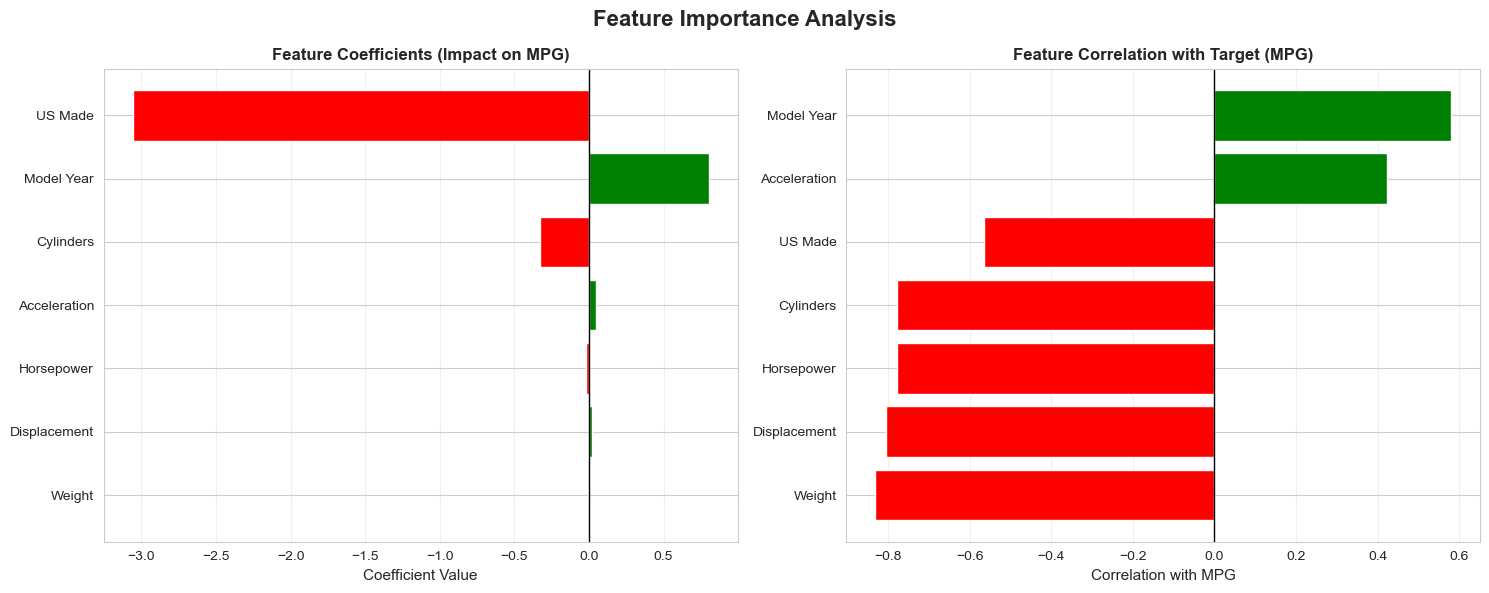

In [60]:
# =============================
# Part 6: Feature Importance Visualization
# =============================
print("\n" + "=" * 60)
print("PART 6: FEATURE IMPORTANCE")
print("=" * 60)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Feature Importance Analysis', fontsize=16, fontweight='bold')

# 1. Coefficient Magnitude
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_,
    'Abs_Coefficient': np.abs(lr.coef_)
}).sort_values('Abs_Coefficient', ascending=True)

axes[0].barh(coef_df['Feature'], coef_df['Coefficient'], 
             color=['red' if x < 0 else 'green' for x in coef_df['Coefficient']])
axes[0].set_xlabel('Coefficient Value', fontsize=11)
axes[0].set_title('Feature Coefficients (Impact on MPG)', fontsize=12, fontweight='bold')
axes[0].axvline(x=0, color='black', linestyle='-', lw=1)
axes[0].grid(True, alpha=0.3, axis='x')

# 2. Feature Correlation with MPG
mpg_corr = df_clean[numeric_cols].corr()['MPG'].drop('MPG').sort_values()
colors = ['red' if x < 0 else 'green' for x in mpg_corr]
axes[1].barh(mpg_corr.index, mpg_corr.values, color=colors)
axes[1].set_xlabel('Correlation with MPG', fontsize=11)
axes[1].set_title('Feature Correlation with Target (MPG)', fontsize=12, fontweight='bold')
axes[1].axvline(x=0, color='black', linestyle='-', lw=1)
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()



PART 7: RECURSIVE FEATURE ELIMINATION (RFE)

Feature Selection Results:
        Feature  Selected  Ranking
0     Cylinders      True        1
4  Acceleration      True        1
5    Model Year      True        1
6       US Made      True        1
2    Horsepower     False        2
1  Displacement     False        3
3        Weight     False        4

Selected Features (Top 4): ['Cylinders', 'Acceleration', 'Model Year', 'US Made']

Model Performance with Selected Features:
R² Score: 0.7036
RMSE: 3.8894


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


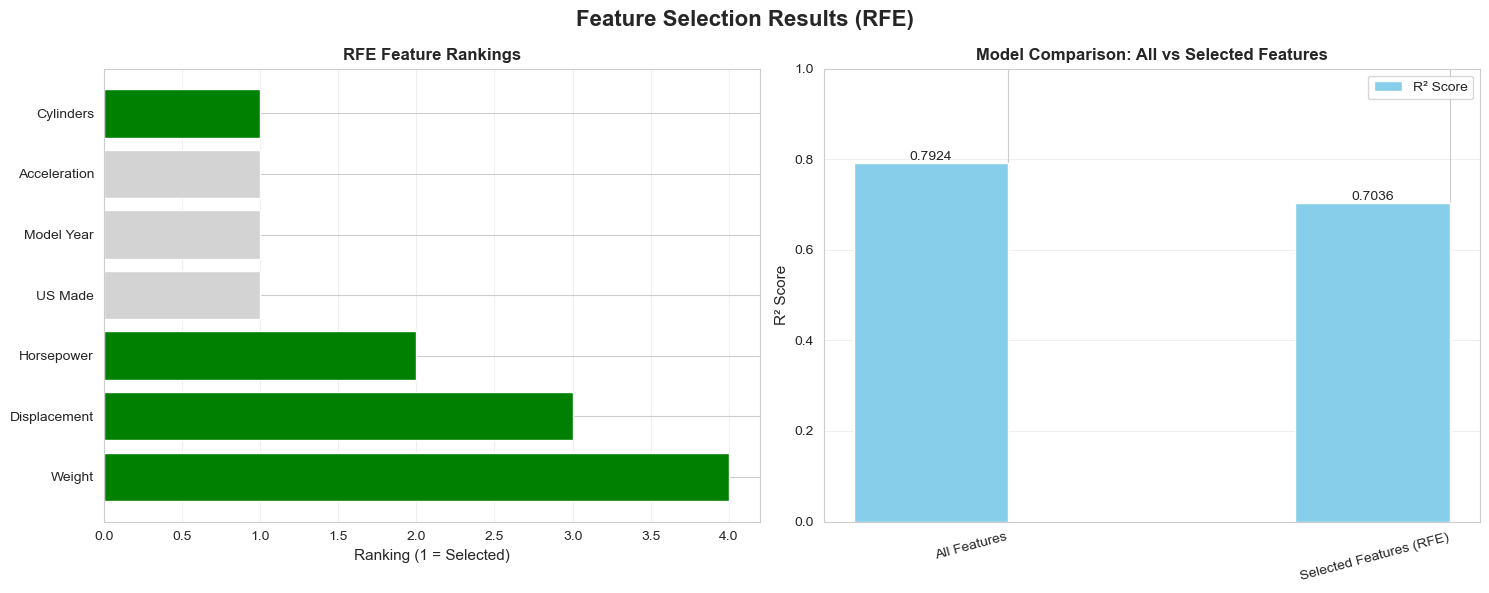

In [63]:
# =============================
# Part 7: Feature Selection with RFE
# =============================
print("\n" + "=" * 60)
print("PART 7: RECURSIVE FEATURE ELIMINATION (RFE)")
print("=" * 60)

# Perform RFE
selector = RFE(LinearRegression(), n_features_to_select=4)
selector.fit(X, y)

# Get selected features
selected_features = X.columns[selector.support_].tolist()
feature_ranking = pd.DataFrame({
    'Feature': X.columns,
    'Selected': selector.support_,
    'Ranking': selector.ranking_
}).sort_values('Ranking')

print("\nFeature Selection Results:")
print(feature_ranking)
print(f"\nSelected Features (Top 4): {selected_features}")

# Retrain model with selected features
X_selected = X[selected_features]
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

lr_selected = LinearRegression()
lr_selected.fit(X_train_sel, y_train_sel)
y_pred_sel = lr_selected.predict(X_test_sel)

r2_selected = r2_score(y_test_sel, y_pred_sel)
rmse_selected = mean_squared_error(y_test_sel, y_pred_sel, squared=False)

print(f"\nModel Performance with Selected Features:")
print(f"R² Score: {r2_selected:.4f}")
print(f"RMSE: {rmse_selected:.4f}")

# Visualize RFE Results
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Feature Selection Results (RFE)', fontsize=16, fontweight='bold')

# 1. Feature Rankings
colors_rank = ['green' if s else 'lightgray' for s in selector.support_]
axes[0].barh(feature_ranking['Feature'], feature_ranking['Ranking'], color=colors_rank)
axes[0].set_xlabel('Ranking (1 = Selected)', fontsize=11)
axes[0].set_title('RFE Feature Rankings', fontsize=12, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(True, alpha=0.3, axis='x')

# 2. Model Comparison
models = ['All Features', 'Selected Features (RFE)']
r2_scores = [test_r2, r2_selected]
rmse_scores = [test_rmse, rmse_selected]

x_pos = np.arange(len(models))
width = 0.35

bars1 = axes[1].bar(x_pos - width/2, r2_scores, width, label='R² Score', color='skyblue')
axes[1].set_ylabel('R² Score', fontsize=11)
axes[1].set_ylim([0, 1])
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(models, rotation=15, ha='right')
axes[1].set_title('Model Comparison: All vs Selected Features', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('feature_selection.png', dpi=300, bbox_inches='tight')
plt.show()


In [65]:
# =============================
# Summary Report
# =============================
print("\n" + "=" * 60)
print("FINAL SUMMARY REPORT")
print("=" * 60)
print(f"\nData Cleaning:")
print(f"  - Original dataset: {original_size} rows")
print(f"  - Clean dataset: {len(df_clean)} rows")
print(f"  - Rows removed: {removed_rows} ({removed_rows/original_size*100:.2f}%)")

print(f"\nModel Performance (All Features):")
print(f"  - Training R²: {train_r2:.4f}")
print(f"  - Testing R²: {test_r2:.4f}")
print(f"  - Testing RMSE: {test_rmse:.4f}")
print(f"  - Testing MAE: {test_mae:.4f}")

print(f"\nModel Performance (Selected Features):")
print(f"  - Features used: {', '.join(selected_features)}")
print(f"  - Testing R²: {r2_selected:.4f}")
print(f"  - Testing RMSE: {rmse_selected:.4f}")

print(f"\nTop 3 Most Important Features (by correlation):")
top_features = df_clean[numeric_cols].corr()['MPG'].drop('MPG').abs().sort_values(ascending=False).head(3)
for idx, (feature, corr) in enumerate(top_features.items(), 1):
    print(f"  {idx}. {feature}: {corr:.4f}")

print("\n" + "=" * 60)
print("Analysis complete! Visualizations saved as PNG files.")
print("=" * 60)


FINAL SUMMARY REPORT

Data Cleaning:
  - Original dataset: 398 rows
  - Clean dataset: 392 rows
  - Rows removed: 6 (1.51%)

Model Performance (All Features):
  - Training R²: 0.8285
  - Testing R²: 0.7924
  - Testing RMSE: 3.2552
  - Testing MAE: 2.4782

Model Performance (Selected Features):
  - Features used: Cylinders, Acceleration, Model Year, US Made
  - Testing R²: 0.7036
  - Testing RMSE: 3.8894

Top 3 Most Important Features (by correlation):
  1. Weight: 0.8322
  2. Displacement: 0.8051
  3. Horsepower: 0.7784

Analysis complete! Visualizations saved as PNG files.
